<a href="https://colab.research.google.com/github/Nanda74775/MMO_LAB/blob/main/MMO_LAB8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gym
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict


In [ ]:
env = gym.make('Taxi-v3')


In [ ]:
def sarsa(env, num_episodes, alpha, gamma, epsilon):
    Q = defaultdict(lambda: np.zeros(env.action_space.n))

    def epsilon_greedy_policy(state, epsilon):
        if np.random.rand() < epsilon:
            return env.action_space.sample()
        else:
            return np.argmax(Q[state])

    rewards = []
    for i_episode in range(num_episodes):
        state = env.reset()
        action = epsilon_greedy_policy(state, epsilon)
        total_reward = 0
        done = False
        while not done:
            next_state, reward, done, _ = env.step(action)
            next_action = epsilon_greedy_policy(next_state, epsilon)
            Q[state][action] += alpha * (reward + gamma * Q[next_state][next_action] - Q[state][action])
            state = next_state
            action = next_action
            total_reward += reward
        rewards.append(total_reward)
    return Q, rewards


In [ ]:
def q_learning(env, num_episodes, alpha, gamma, epsilon):
    Q = defaultdict(lambda: np.zeros(env.action_space.n))

    def epsilon_greedy_policy(state, epsilon):
        if np.random.rand() < epsilon:
            return env.action_space.sample()
        else:
            return np.argmax(Q[state])

    rewards = []
    for i_episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        done = False
        while not done:
            action = epsilon_greedy_policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            best_next_action = np.argmax(Q[next_state])
            Q[state][action] += alpha * (reward + gamma * Q[next_state][best_next_action] - Q[state][action])
            state = next_state
            total_reward += reward
        rewards.append(total_reward)
    return Q, rewards


In [ ]:
def double_q_learning(env, num_episodes, alpha, gamma, epsilon):
    Q1 = defaultdict(lambda: np.zeros(env.action_space.n))
    Q2 = defaultdict(lambda: np.zeros(env.action_space.n))

    def epsilon_greedy_policy(state, epsilon, Q1, Q2):
        if np.random.rand() < epsilon:
            return env.action_space.sample()
        else:
            return np.argmax(Q1[state] + Q2[state])

    rewards = []
    for i_episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        done = False
        while not done:
            action = epsilon_greedy_policy(state, epsilon, Q1, Q2)
            next_state, reward, done, _ = env.step(action)
            if np.random.rand() < 0.5:
                best_next_action = np.argmax(Q1[next_state])
                Q1[state][action] += alpha * (reward + gamma * Q2[next_state][best_next_action] - Q1[state][action])
            else:
                best_next_action = np.argmax(Q2[next_state])
                Q2[state][action] += alpha * (reward + gamma * Q1[next_state][best_next_action] - Q2[state][action])
            state = next_state
            total_reward += reward
        rewards.append(total_reward)
    return Q1, Q2, rewards


In [ ]:
def hyperparameter_tuning():
    num_episodes = 500
    alpha_values = [0.1, 0.5, 0.9]
    gamma_values = [0.9, 0.95, 0.99]
    epsilon_values = [0.1, 0.5, 0.9]

    best_params = None
    best_reward = float('-inf')

    for alpha in alpha_values:
        for gamma in gamma_values:
            for epsilon in epsilon_values:
                _, rewards = q_learning(env, num_episodes, alpha, gamma, epsilon)
                avg_reward = np.mean(rewards)
                if avg_reward > best_reward:
                    best_reward = avg_reward
                    best_params = (alpha, gamma, epsilon)
                print(f'alpha: {alpha}, gamma: {gamma}, epsilon: {epsilon}, avg_reward: {avg_reward}')

    print(f'Best params: alpha: {best_params[0]}, gamma: {best_params[1]}, epsilon: {best_params[2]}')
    return best_params

best_params = hyperparameter_tuning()


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


alpha: 0.1, gamma: 0.9, epsilon: 0.1, avg_reward: -188.478
alpha: 0.1, gamma: 0.9, epsilon: 0.5, avg_reward: -373.518
alpha: 0.1, gamma: 0.9, epsilon: 0.9, avg_reward: -690.598
alpha: 0.1, gamma: 0.95, epsilon: 0.1, avg_reward: -189.132
alpha: 0.1, gamma: 0.95, epsilon: 0.5, avg_reward: -369.342
alpha: 0.1, gamma: 0.95, epsilon: 0.9, avg_reward: -683.448
alpha: 0.1, gamma: 0.99, epsilon: 0.1, avg_reward: -189.268
alpha: 0.1, gamma: 0.99, epsilon: 0.5, avg_reward: -358.318
alpha: 0.1, gamma: 0.99, epsilon: 0.9, avg_reward: -664.67
alpha: 0.5, gamma: 0.9, epsilon: 0.1, avg_reward: -70.676
alpha: 0.5, gamma: 0.9, epsilon: 0.5, avg_reward: -181.202
alpha: 0.5, gamma: 0.9, epsilon: 0.9, avg_reward: -616.678
alpha: 0.5, gamma: 0.95, epsilon: 0.1, avg_reward: -71.174
alpha: 0.5, gamma: 0.95, epsilon: 0.5, avg_reward: -169.788
alpha: 0.5, gamma: 0.95, epsilon: 0.9, avg_reward: -593.716
alpha: 0.5, gamma: 0.99, epsilon: 0.1, avg_reward: -74.388
alpha: 0.5, gamma: 0.99, epsilon: 0.5, avg_reward:

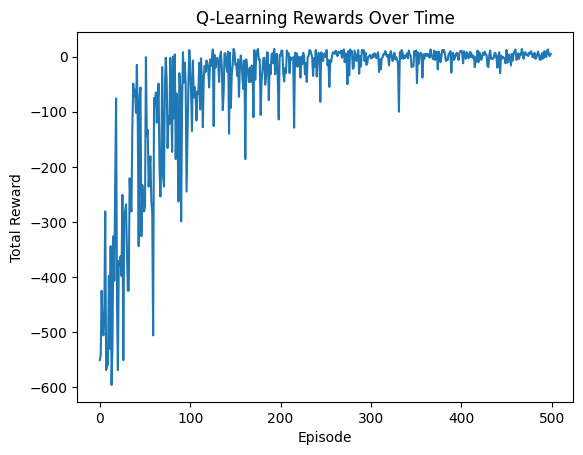

In [ ]:
Q, rewards = q_learning(env, num_episodes=500, alpha=best_params[0], gamma=best_params[1], epsilon=best_params[2])
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Q-Learning Rewards Over Time')
plt.show()
